<a href="https://colab.research.google.com/github/mloumeau/cse480-notebooks/blob/master/08_2_Ponder_and_Prove_Turing_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Turing Machines
## Due: Saturday, 27 February 2021, 11:59 pm

In [1]:
Brother_Neff_feedback = '''
Excellent work, Matthew --- the best I've seen so far!

Your solutions are well-thought-out, and the testing you did was more than 
adequate.

I especially liked your copyTM and how you spliced it (and your addCharTM)
into the collatz_tm!
'''

# Import, Then Assignment

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 11.67 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


## TODO Study Examples

In the folders

Jove/For_CS3100_Fall2020/17_DTMs_and_NDTMs

and 

Jove/For_CS3100_Fall2020/18_More_TM_Exs

you will find many examples of Deterministic Turing Machines, and Nondeterministic Turing Machines. Study these carefully!

## TODO Write a Summary

Describe what you learned about TMs of both varieties.

## DTM and DFA
Deterministic Turing Machines act like Deterministic Finite Automata in the sense of only having one option per state for each symbol in the alphabet. There is only one initial state allowed, just like a DFA. However, something we noticed is that DFAs require a path on every state for each symbol on the alphabet, even if this means the path leads towards a blackhole state. With DFA in Jove, we are able to display this blackhole state. We were unable to access the blackhole with the DTM. Our question is, is there indeed a blackhole state that is necessary for a totalized DTM? Our guess is that it is necessary.

## NTM and NFA
Nondeterministic Turing Machines act like Nondeterministic Finite Automata in the sense of having multiple options for each symbol on at least one state in the machine/automata. They are also both allowed to have multiple initial states. Just like an NFA, a NTM has multiple places where the string could be. An evaluation is done for each possible location where the string could be found.

## TODO Create a DTM to Delete a Character

This task is to delete a character from the tape string. Deleting the current symbol means transforming the tape from $x\sigma y$ to $xy$ where $\sigma$ is any symbol, including a blank, and $y$ is a string of nonblank symbols. Assume the input alphabet is $\{a, b\}$.

HINT: Use a couple of states (labeled $q_a$ and $q_b$, say) for your TM to remember a symbol between the time it is erased and the time it is copied in the next square to the left. (The complete DTM requires about 6 states total, with 12 transitions.)


## Formatting
explore_tm(delCharTM, "ab#aba", 100)

* '#' symbol will be removed.
* '#' symbol cannot be at the end.

Generating LALR tables


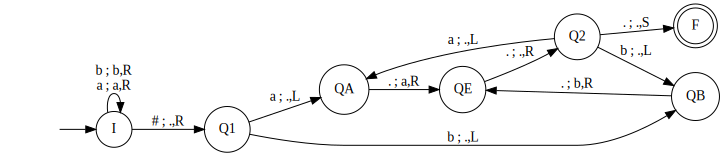

In [ ]:
delCharTM = md2mc('''TM
I : a ; a, R -> I
I : b ; b, R -> I
I : # ; ., R -> Q1

Q1 : a ; ., L -> QA
Q1 : b ; ., L -> QB

Q2 : a ; ., L -> QA
Q2 : b ; ., L -> QB
Q2 : . ; ., S -> F

QA : . ; a, R -> QE
QB : . ; b, R -> QE

QE : . ; ., R -> Q2


''')
DOdelCharTM = dotObj_tm(delCharTM, FuseEdges=True)
DOdelCharTM


## '#' symbol will be deleted.

In [ ]:
explore_tm(delCharTM, "ab#aba", 100)


Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 6, 'ababa.........', 87)
 via .. 
 ->('I', 0, 'ab#aba', 100)
 ->('I', 1, 'ab#aba', 99)
 ->('I', 2, 'ab#aba', 98)
 ->('Q1', 3, 'ab.aba', 97)
 ->('QA', 2, 'ab..ba', 96)
 ->('QE', 3, 'aba.ba', 95)
 ->('Q2', 4, 'aba.ba', 94)
 ->('QB', 3, 'aba..a', 93)
 ->('QE', 4, 'abab.a', 92)
 ->('Q2', 5, 'abab.a', 91)
 ->('QA', 4, 'abab..', 90)
 ->('QE', 5, 'ababa.', 89)
 ->('Q2', 6, 'ababa.', 88)
 ->('F', 6, 'ababa.........', 87)


## Delete symbol cannot be at the end (y is a string of non-empty chars)

In [ ]:
explore_tm(delCharTM, "ababa#", 100)


Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('Q1', 6, 'ababa.', 94)
 via .. 
 ->('I', 0, 'ababa#', 100)
 ->('I', 1, 'ababa#', 99)
 ->('I', 2, 'ababa#', 98)
 ->('I', 3, 'ababa#', 97)
 ->('I', 4, 'ababa#', 96)
 ->('I', 5, 'ababa#', 95)
 ->('Q1', 6, 'ababa.', 94)


## TODO Create a DTM to Insert a Character

This task is the opposite of the first one, namely, to insert a character into the tape string. Inserting the symbol $\sigma$ is done virtually the same way as deleting, except that the single pass goes from left to right, symbols are moved to the right instead of to the left, and the move that starts things off writes $\sigma$ instead of a blank.


## Formatting 

explore_tm(addCharTM, "abbbbaAb", 100)
 * First char is not really in string. It is the input that indicates what char we will be adding
 * Everything past the first char will be the string that will need inserting.
 * Capital A or B means this is where the character will be added (to the left).
 * The capital A or B will then be converted to a lower case

returns 'bbbbaaab'

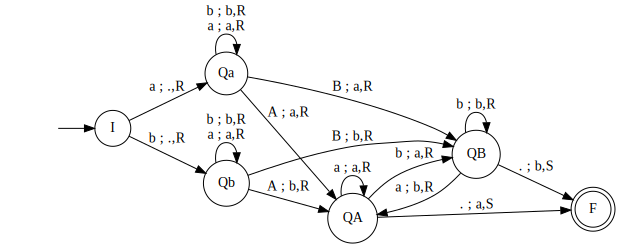

In [ ]:
addCharTM = md2mc('''TM
I : a ; ., R -> Qa
I : b ; ., R -> Qb

Qa : a ; a, R -> Qa
Qa : b ; b, R -> Qa
Qa : A ; a, R -> QA
Qa : B ; a, R -> QB

Qb : a ; a, R -> Qb
Qb : b ; b, R -> Qb
Qb : A ; b, R -> QA
Qb : B ; b, R -> QB

QA : a ; a , R -> QA
QA : b ; a , R -> QB
QA : . ; a , S -> F


QB : a ; b , R -> QA
QB : b ; b , R -> QB
QB : . ; b , S -> F


''')
DOaddCharTM = dotObj_tm(addCharTM, FuseEdges=True)
DOaddCharTM

## a inserted before B

In [ ]:
explore_tm(addCharTM, "aabbbB", 100)


Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 6, '.abbbab.......', 93)
 via .. 
 ->('I', 0, 'aabbbB', 100)
 ->('Qa', 1, '.abbbB', 99)
 ->('Qa', 2, '.abbbB', 98)
 ->('Qa', 3, '.abbbB', 97)
 ->('Qa', 4, '.abbbB', 96)
 ->('Qa', 5, '.abbbB', 95)
 ->('QB', 6, '.abbba', 94)
 ->('F', 6, '.abbbab.......', 93)


## a inserted before A

In [ ]:
explore_tm(addCharTM, "aabAab", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 6, '.abaaab.......', 93)
 via .. 
 ->('I', 0, 'aabAab', 100)
 ->('Qa', 1, '.abAab', 99)
 ->('Qa', 2, '.abAab', 98)
 ->('Qa', 3, '.abAab', 97)
 ->('QA', 4, '.abaab', 96)
 ->('QA', 5, '.abaab', 95)
 ->('QB', 6, '.abaaa', 94)
 ->('F', 6, '.abaaab.......', 93)


## b inserted before B

In [ ]:
explore_tm(addCharTM, "baBaab", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 6, '.abbaab.......', 93)
 via .. 
 ->('I', 0, 'baBaab', 100)
 ->('Qb', 1, '.aBaab', 99)
 ->('Qb', 2, '.aBaab', 98)
 ->('QB', 3, '.abaab', 97)
 ->('QA', 4, '.abbab', 96)
 ->('QA', 5, '.abbab', 95)
 ->('QB', 6, '.abbaa', 94)
 ->('F', 6, '.abbaab.......', 93)


## b inserted before A

In [ ]:
explore_tm(addCharTM, "bAabba", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 6, '.baabba.......', 93)
 via .. 
 ->('I', 0, 'bAabba', 100)
 ->('Qb', 1, '.Aabba', 99)
 ->('QA', 2, '.babba', 98)
 ->('QA', 3, '.babba', 97)
 ->('QB', 4, '.baaba', 96)
 ->('QB', 5, '.baaba', 95)
 ->('QA', 6, '.baabb', 94)
 ->('F', 6, '.baabba.......', 93)


## TODO Create a DTM to Copy a String

Let $\sqcup$ represent the blank symbol. A *Copy* DTM starts with tape $\sqcup\ x$ where $x$ is a string of nonblank symbols, and ends up with $\sqcup\ x \sqcup x$. Again, assume the input alphabet is $\{a, b\}$.

HINT: This DTM requires about 10 states, and not quite double that many transitions.

## Formatting

copyTM('.aab')
* First char will always be a .
* Following the dot is the string that will be duplicated

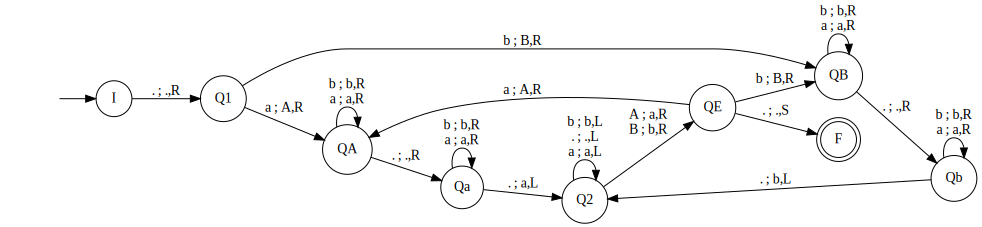

In [ ]:
copyTM = md2mc('''TM

I : . ; . , R -> Q1

Q1 : a ; A , R -> QA
Q1 : b ; B , R -> QB

QE : a ; A , R -> QA
QE : b ; B , R -> QB
QE : . ; . , S -> F

QA : a ; a , R -> QA
QA : b ; b , R -> QA
QA : . ; . , R -> Qa

QB : a ; a , R -> QB
QB : b ; b , R -> QB
QB : . ; . , R -> Qb

Qa : . ; a , L -> Q2
Qa : a ; a , R -> Qa
Qa : b ; b , R -> Qa

Qb : . ; b , L -> Q2
Qb : a ; a , R -> Qb
Qb : b ; b , R -> Qb

Q2 : . ; . , L -> Q2
Q2 : a ; a , L -> Q2
Q2 : b ; b , L -> Q2
Q2 : A ; a , R -> QE
Q2 : B ; b , R -> QE


''')
DOcopyTM = dotObj_tm(copyTM, FuseEdges=True)
DOcopyTM

## Copy .aab

In [ ]:
explore_tm(copyTM, ".aab", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 4, '.aab.aab....', 71)
 via .. 
 ->('I', 0, '.aab', 100)
 ->('Q1', 1, '.aab', 99)
 ->('QA', 2, '.Aab', 98)
 ->('QA', 3, '.Aab', 97)
 ->('QA', 4, '.Aab', 96)
 ->('Qa', 5, '.Aab........', 95)
 ->('Q2', 4, '.Aab.a......', 94)
 ->('Q2', 3, '.Aab.a......', 93)
 ->('Q2', 2, '.Aab.a......', 92)
 ->('Q2', 1, '.Aab.a......', 91)
 ->('QE', 2, '.aab.a......', 90)
 ->('QA', 3, '.aAb.a......', 89)
 ->('QA', 4, '.aAb.a......', 88)
 ->('Qa', 5, '.aAb.a......', 87)
 ->('Qa', 6, '.aAb.a......', 86)
 ->('Q2', 5, '.aAb.aa.....', 85)
 ->('Q2', 4, '.aAb.aa.....', 84)
 ->('Q2', 3, '.aAb.aa.....', 83)
 ->('Q2', 2, '.aAb.aa.....', 82)
 ->('QE', 3, '.aab.aa.....', 81)
 ->('QB', 4, '.aaB.aa.....', 80)
 ->('Qb', 5, '.aaB.aa.....', 79)
 ->('Qb', 6, '.aaB.aa.....', 78)
 ->('Qb', 7, '.aaB.aa.....', 77)
 ->('Q2', 6, '.aaB.aab....', 76)
 ->('Q2', 5, '.aaB.aab....', 75)
 ->('Q2', 4, '.aaB.aab....', 74)
 ->('Q2', 3, '.aaB.aab..

## Copy .abbab

In [ ]:
explore_tm(copyTM, ".abbab", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 6, '.abbab.abbab..', 33)
 via .. 
 ->('I', 0, '.abbab', 100)
 ->('Q1', 1, '.abbab', 99)
 ->('QA', 2, '.Abbab', 98)
 ->('QA', 3, '.Abbab', 97)
 ->('QA', 4, '.Abbab', 96)
 ->('QA', 5, '.Abbab', 95)
 ->('QA', 6, '.Abbab', 94)
 ->('Qa', 7, '.Abbab........', 93)
 ->('Q2', 6, '.Abbab.a......', 92)
 ->('Q2', 5, '.Abbab.a......', 91)
 ->('Q2', 4, '.Abbab.a......', 90)
 ->('Q2', 3, '.Abbab.a......', 89)
 ->('Q2', 2, '.Abbab.a......', 88)
 ->('Q2', 1, '.Abbab.a......', 87)
 ->('QE', 2, '.abbab.a......', 86)
 ->('QB', 3, '.aBbab.a......', 85)
 ->('QB', 4, '.aBbab.a......', 84)
 ->('QB', 5, '.aBbab.a......', 83)
 ->('QB', 6, '.aBbab.a......', 82)
 ->('Qb', 7, '.aBbab.a......', 81)
 ->('Qb', 8, '.aBbab.a......', 80)
 ->('Q2', 7, '.aBbab.ab.....', 79)
 ->('Q2', 6, '.aBbab.ab.....', 78)
 ->('Q2', 5, '.aBbab.ab.....', 77)
 ->('Q2', 4, '.aBbab.ab.....', 76)
 ->('Q2', 3, '.aBbab.ab.....', 75)
 ->('Q2', 2, '.aBba

## Cannot have empty string following '.'

In [ ]:
explore_tm(copyTM, ".", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('Q1', 1, '.', 99)
 via .. 
 ->('I', 0, '.', 100)
 ->('Q1', 1, '.', 99)


## Cannot have string start without '.'

In [ ]:
explore_tm(copyTM, "aab", 100)

Detailing the halted configs now.
Rejected at  ('I', 0, 'aab', 100)
 via .. 
 ->('I', 0, 'aab', 100)


## TODO Refresh Your Knowledge of the 3x+1 Conjecture

The code on page 200 does the 3x+1 Conjecture testing recursively:

In [ ]:
def tep1(x):
    if (x==1):
        return 1
    elif (x%2 == 0):
        return tep1(x/2)
    else:
        return tep1(3*x+1)

print(tep1(3))
print(tep1(191))
print(tep1(19192949297080))
print(tep1(191929492970809272397923472398492839482))
print(tep1(191929492970809272397923472398492839482938492))

1
1
1
1
1


Two Python techniques --- "memoizing" and "listifying" --- make for faster code:

In [ ]:
def memoize(func):
    results = {}
    def inner(i):
        if not i in results:
            results[i] = func(i)
        return results[i]
    return inner

def listify(func):
    def inner(x):
        return list(func(x))
    return inner

@memoize
def tep1(x):
    return 1 if x == 2 else tep1(x/2) if x%2 == 0 else tep1(3*x+1)

@listify
def tepmany(x):
    for i in range(1, x+1):
        yield tep1(i)

print(max(tepmany(100000)))

1


# TODO Modify a NON-Trivial Turing Machine Program

The Turing machine program on page 202 performs the continuing 3x+1 transformation on an input that is a binary number. So for example if the
initial tape has

$11$

which is the binary representation of the decimal number three, the final tape
will have

$1$

on it.

Modify the program so that a trace of all intermediate results appears on the output tape, e.g.:

$11*1010*101*10000*1000*100*10*1$

which separates with a star the binary representations of the numbers in the
continuing 3x+1 transformation from 3 to 10 to 5 to 16 to 8 to 4 to 2 to 1.


## Explanation of our TM

The below TM makes use of our previously implemented cpyStrTM and addCharTM Turing machines. A modified version of cpyStrTM is used to copy the current state of the tape such that the proceeding method will only affect the copy, leaving a trace of the previous value on the tape. cpyStrTM is placed between each edge leading into the “goto_lsb” state. It is also placed after the “branch” state’s transition that loops back to itself. Though, in this case, that transition will go back to the “goto_lsb” state after exiting cpyStrTM.


The addCharTM was split into two sections. One is placed between the “. ; 0, L” transition that goes from the “10_fma” state to the “01_fma” state. This version of the addCharTM will only add a 0 at the defined location. The second addCharTM variation is placed between the “01_fma” state to “goto_lsb” state transition and will only add a 1 at the defined location.


Some other helper states were also added such as a Qainter and Qbinter which help with moving to the addCharTM variations. There were also a few states and transitions adjusted to account for the “*”s between each copy of the tape’s current state.



## Python solution (binary results)

In [ ]:
def collatz(x):
    if (x%2 == 0): 
        print(bin(x)[2:], ", ",end="")
        return collatz(x//2)
    elif (x==1):
        print(bin(x)[2:],end="")
        return
    else:
        print(bin(x)[2:], ", ",end="")
        return collatz(3*x + 1)

In [ ]:

# Base code from Ian Briggs.

'''
(src='File', fname='../../machines/tmfiles/collatz_tm.tm')
'''

collatz_tm = md2mc(
"""
TM

i_start      : 0; ., R -> i_start             !! erase this zero and try to find more
!! i_start      : 1; 1, R -> goto_lsb            !! we have a proper number, go to the lsb
i_start      : 1; 1, S -> QE                  !! Perform initial copy.
i_start      : .; ., S -> error               !! error on no input or input == 0


goto_lsb     : 0; 0,R | 1; 1,R -> goto_lsb    !! scan off the right edge of the number
goto_lsb     : .; .,L -> branch               !! take a step back to be on the lsb and start branch


!!branch       : 0; .,L -> branch               !! number is even, divide by two and re-branch
branch       : 0; .,L -> QEinter

QEinter : 0 ; 0, L -> QEinter
QEinter : 1 ; 1, L -> QEinter
QEinter : . ; ., R -> QE
QEinter : * ; *, R -> QE

branch       : 1; 1,L -> check_n_eq_1         !! number is odd, check if it is 1


check_n_eq_1 : 0; 0,R | 1; 1,R -> 01_fma      !! number wasn't 1, goto 3n+1
!! check_n_eq_1 : .; .,R -> f_halt               !! number was 1, halt
check_n_eq_1 : *; .,R -> temp_halt

temp_halt : 1; ., S -> f_halt


!! carrying 0 we see a 0 so write 0 and carry 0 forward
00_fma       : 0; 0,L -> 00_fma

!! carrying 0 we see a 1 (times 3 is 11) so write 1 and carry 1 forward
00_fma       : 1; 1,L -> 01_fma

!! reached the end of the number, go back to the start
!! 00_fma       : .; .,R -> goto_lsb  
00_fma       : *; *,R -> QE           


!! carrying 1 we see a 0 so write 1 and carry 0 forward
01_fma       : 0; 1,L -> 00_fma  

!! carrying 1 we see a 1 (times 3 is 11, plus our carry is 100) so write 0 and carry 10 forward
01_fma       : 1; 0,L -> 10_fma  

!! reached the end of the number, write our 1 and go back to the start
!! 01_fma       : .; 1,R -> goto_lsb 
01_fma : *; *, R -> Qainter

Qainter : 0 ; B, S -> Qa
Qainter : 1 ; A, S -> Qa


!! carrying 10 we see a 0, so write 0 and carry 1 forward
10_fma       : 0; 0,L -> 01_fma

!! carrying 10 we see a 1 (times 3 is 11, plus our carry is 101), so write 1 and carry 10 forward
10_fma       : 1; 1,L -> 10_fma

!! reached the end of the number, write a 0 from our 10 and carry 1
!!10_fma       : .; 0,L -> 01_fma
10_fma : * ; *, R -> Qbinter

Qbinter : 0 ; B, S -> Qb
Qbinter : 1 ; A, S -> Qb






!!Copy TM we made above


QE : 1 ; A, R -> QA
QE : 0 ; B, R -> QB

QE2 : 1 ; A, R -> QA
QE2 : 0 ; B, R -> QB 
QE2 : * ; *, R -> goto_lsb 

QA : 1 ; 1, R -> QA
QA : 0 ; 0, R -> QA
QA : . ; *, R -> QaddA
QA : * ; *, R -> QaddA

QB : 1 ; 1, R -> QB
QB : 0 ; 0, R -> QB
QB : . ; *, R -> QaddB
QB : * ; *, R -> QaddB

QaddA : 1 ; 1, R -> QaddA
QaddA : 0 ; 0, R -> QaddA
QaddA : . ; 1, L -> Qret

QaddB : 1 ; 1, R -> QaddB
QaddB : 0 ; 0, R -> QaddB
QaddB : . ; 0, L -> Qret

Qret : 1 ; 1, L -> Qret
Qret : 0 ; 0, L -> Qret
Qret : * ; *, L -> Qret
Qret : A ; 1, R -> QE2
Qret : B ; 0, R -> QE2




!! Add char TM from above

Qb : 1 ; 1, L -> Qb
Qb : 0 ; 0, L -> Qb
Qb : A ; 0, R -> QA0
Qb : B ; 0, R -> QB0
Qb : * ; *, S -> 01_fma

QA0 : 1 ; 1, R -> QA0
QA0 : 0 ; 1, R -> QB0
QA0 : . ; 1, L -> Qb

QB0 : 1 ; 0, R -> QA0
QB0 : 0 ; 0, R -> QB0
QB0 : . ; 0, L -> Qb


Qa : 1 ; 1, L -> Qa
Qa : 0 ; 0, L -> Qa
Qa : A ; 1, R -> QA1
Qa : B ; 1, R -> QB1
Qa : * ; *, R -> QE

QA1 : 1 ; 1, R -> QA1
QA1 : 0 ; 1, R -> QB1
QA1 : . ; 1, L -> Qa

QB1 : 1 ; 0, R -> QA1
QB1 : 0 ; 0, R -> QB1
QB1 : . ; 0, L -> Qa



"""
)


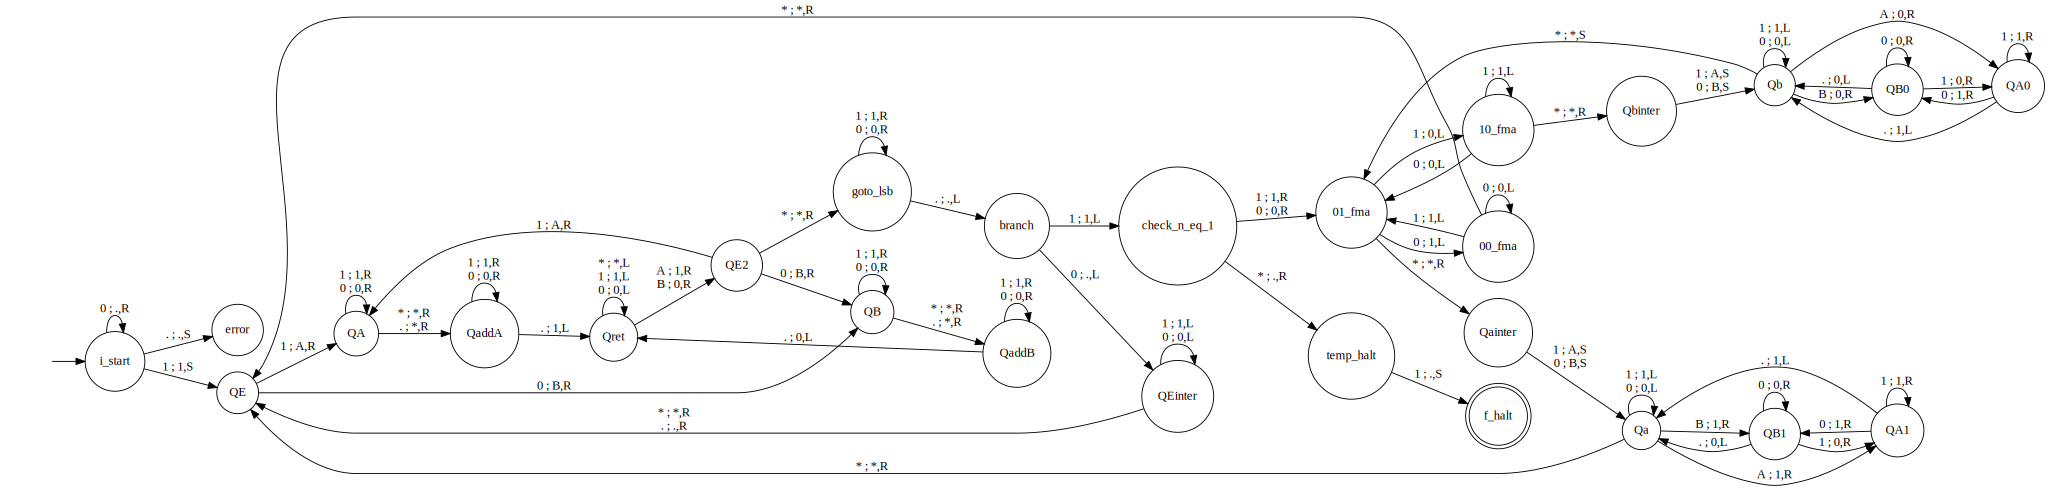

In [ ]:
DOcollatz = dotObj_tm(collatz_tm, FuseEdges=True)
DOcollatz

In [ ]:
explore_tm(collatz_tm, "11", 1000)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('f_halt', 32, '11*1010*101*10000*1000*100*10*1...', 644)
 via .. 
 ->('i_start', 0, '11', 1000)
 ->('QE', 0, '11', 999)
 ->('QA', 1, 'A1', 998)
 ->('QA', 2, 'A1', 997)
 ->('QaddA', 3, 'A1*.......', 996)
 ->('Qret', 2, 'A1*1......', 995)
 ->('Qret', 1, 'A1*1......', 994)
 ->('Qret', 0, 'A1*1......', 993)
 ->('QE2', 1, '11*1......', 992)
 ->('QA', 2, '1A*1......', 991)
 ->('QaddA', 3, '1A*1......', 990)
 ->('QaddA', 4, '1A*1......', 989)
 ->('Qret', 3, '1A*11.....', 988)
 ->('Qret', 2, '1A*11.....', 987)
 ->('Qret', 1, '1A*11.....', 986)
 ->('QE2', 2, '11*11.....', 985)
 ->('goto_lsb', 3, '11*11.....', 984)
 ->('goto_lsb', 4, '11*11.....', 983)
 ->('goto_lsb', 5, '11*11.....', 982)
 ->('branch', 4, '11*11.....', 981)
 ->('check_n_eq_1', 3, '11*11.....', 980)
 ->('01_fma', 4, '11*11..

## Compare answers for '11' in our TM with python solution

In [ ]:
collatz(3) # 3 in binary is 11

11 , 1010 , 101 , 10000 , 1000 , 100 , 10 , 1

In [ ]:
explore_tm(collatz_tm, "1000", 1000)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('f_halt', 14, '1000*100*10*1.......', 876)
 via .. 
 ->('i_start', 0, '1000', 1000)
 ->('QE', 0, '1000', 999)
 ->('QA', 1, 'A000', 998)
 ->('QA', 2, 'A000', 997)
 ->('QA', 3, 'A000', 996)
 ->('QA', 4, 'A000', 995)
 ->('QaddA', 5, 'A000*.......', 994)
 ->('Qret', 4, 'A000*1......', 993)
 ->('Qret', 3, 'A000*1......', 992)
 ->('Qret', 2, 'A000*1......', 991)
 ->('Qret', 1, 'A000*1......', 990)
 ->('Qret', 0, 'A000*1......', 989)
 ->('QE2', 1, '1000*1......', 988)
 ->('QB', 2, '1B00*1......', 987)
 ->('QB', 3, '1B00*1......', 986)
 ->('QB', 4, '1B00*1......', 985)
 ->('QaddB', 5, '1B00*1......', 984)
 ->('QaddB', 6, '1B00*1......', 983)
 ->('Qret', 5, '1B00*10.....', 982)
 ->('Qret', 4, '1B00*10.....', 981)
 ->('Qret', 3, '1B00*10.....', 980)
 ->('Qret', 2, '1B00*10.....', 979)
 ->('Qret', 1, '1B00*10.....', 978)
 ->('QE2', 2, '1000*10.....', 977)
 ->('QB', 3, '1

## Compare answers for '1000' in our TM with python solution

In [ ]:
collatz(8) # 8 in binary is 1000

1000 , 100 , 10 , 1

In [ ]:
explore_tm(collatz_tm, "1011", 2000)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('f_halt', 78, '1011*100010*10001*110100*11010*1101*101000*10100*1010*101*10000*1000*100*10*1.......', 956)
 via .. 
 ->('i_start', 0, '1011', 2000)
 ->('QE', 0, '1011', 1999)
 ->('QA', 1, 'A011', 1998)
 ->('QA', 2, 'A011', 1997)
 ->('QA', 3, 'A011', 1996)
 ->('QA', 4, 'A011', 1995)
 ->('QaddA', 5, 'A011*.......', 1994)
 ->('Qret', 4, 'A011*1......', 1993)
 ->('Qret', 3, 'A011*1......', 1992)
 ->('Qret', 2, 'A011*1......', 1991)
 ->('Qret', 1, 'A011*1......', 1990)
 ->('Qret', 0, 'A011*1......', 1989)
 ->('QE2', 1, '1011*1......', 1988)
 ->('QB', 

## Compare answers for '1011' in our TM with python solution

In [ ]:
collatz(11) # 11 in binary = 1011

1011 , 100010 , 10001 , 110100 , 11010 , 1101 , 101000 , 10100 , 1010 , 101 , 10000 , 1000 , 100 , 10 , 1